In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('./Datasets/Call_Center_1999_DataSet.csv', delimiter=';')
df.head(5)

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101,33116,9664491.0,2,PS,1999-01-01,0:00:31,0:00:36,5,0:00:36,0:03:09,153,HANG,0:00:00,0:00:00,0,NO_SERVER,0
1,AA0101,33117,0.0,0,PS,1999-01-01,0:34:12,0:34:23,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,0
2,AA0101,33118,27997683.0,2,PS,1999-01-01,6:55:20,6:55:26,6,6:55:26,6:55:43,17,AGENT,6:55:43,6:56:37,54,MICHAL,0
3,AA0101,33119,0.0,0,PS,1999-01-01,7:41:16,7:41:26,10,0:00:00,0:00:00,0,AGENT,7:41:25,7:44:53,208,BASCH,0
4,AA0101,33120,0.0,0,PS,1999-01-01,8:03:14,8:03:24,10,0:00:00,0:00:00,0,AGENT,8:03:23,8:05:10,107,MICHAL,0


In [4]:
df.columns

Index(['vru.line', 'call_id', 'customer_id', 'priority', 'type', 'date',
       'vru_entry', 'vru_exit', 'vru_time', 'q_start', 'q_exit', 'q_time',
       'outcome', 'ser_start', 'ser_exit', 'ser_time', 'server', 'startdate'],
      dtype='object')

In [5]:
# Cantidad de registros y columnas
df.shape

(444448, 18)

In [6]:
# Tipo de dato y nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444448 entries, 0 to 444447
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   vru.line     444448 non-null  object
 1   call_id      444448 non-null  int64 
 2   customer_id  444448 non-null  object
 3   priority     444448 non-null  int64 
 4   type         444448 non-null  object
 5   date         444448 non-null  object
 6   vru_entry    444448 non-null  object
 7   vru_exit     444448 non-null  object
 8   vru_time     444448 non-null  int64 
 9   q_start      444448 non-null  object
 10  q_exit       444448 non-null  object
 11  q_time       444448 non-null  int64 
 12  outcome      444448 non-null  object
 13  ser_start    444448 non-null  object
 14  ser_exit     444448 non-null  object
 15  ser_time     444448 non-null  int64 
 16  server       444448 non-null  object
 17  startdate    444448 non-null  int64 
dtypes: int64(6), object(12)
memory usage: 61.0+ 

In [7]:
# Transformación de los tipo de datos
df['vru.line']  =df['vru.line'].astype('str')
df['call_id']   =df['call_id'].astype('str')
df['priority']  =df['priority'].astype('category')
df['type']      =df['type'].astype('category')
df['date']      =pd.to_datetime(df['date'])
df['vru_entry'] =pd.to_datetime(df['vru_entry'])
df['vru_exit']  =pd.to_datetime(df['vru_exit'])
df['q_start']   =pd.to_datetime(df['q_start'])
df['q_exit']    =pd.to_datetime(df['q_exit'])
df['outcome']   =df['outcome'].astype('category')
df['ser_start'] =pd.to_datetime(df['ser_start'])
df['ser_exit']  =pd.to_datetime(df['ser_exit'])
df['vru_entry'] =pd.to_datetime(df['vru_entry'])
df['server']    =df['server'].astype('category')

In [8]:
# Confirmación del cambio del tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444448 entries, 0 to 444447
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   vru.line     444448 non-null  object        
 1   call_id      444448 non-null  object        
 2   customer_id  444448 non-null  object        
 3   priority     444448 non-null  category      
 4   type         444448 non-null  category      
 5   date         444448 non-null  datetime64[ns]
 6   vru_entry    444448 non-null  datetime64[ns]
 7   vru_exit     444448 non-null  datetime64[ns]
 8   vru_time     444448 non-null  int64         
 9   q_start      444448 non-null  datetime64[ns]
 10  q_exit       444448 non-null  datetime64[ns]
 11  q_time       444448 non-null  int64         
 12  outcome      444448 non-null  category      
 13  ser_start    444448 non-null  datetime64[ns]
 14  ser_exit     444448 non-null  datetime64[ns]
 15  ser_time     444448 non-null  int6

In [11]:
df['date'] = pd.to_numeric(df['date'])
df.describe()

,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,ser_start,ser_exit,ser_time,startdate
count,4.444480e+05,444448,444448,444448.000000,444448,444448,444448.000000,444448,444448,444448.000000,444448.000000
mean,9.312549e+17,2024-08-16 14:27:15.241546240,2024-08-16 14:27:25.527627520,10.286081,2024-08-16 08:29:01.435895552,2024-08-16 08:29:48.776293120,59.004304,2024-08-16 11:43:11.602028288,2024-08-16 11:44:47.382784,152.561776,172.333974
min,9.151488e+17,2024-08-16 00:00:01,2024-08-16 00:00:08,-362.000000,2024-08-16 00:00:00,2024-08-16 00:00:00,0.000000,2024-08-16 00:00:00,2024-08-16 00:00:00,0.000000,0.000000
25%,9.237888e+17,2024-08-16 10:45:42,2024-08-16 10:45:51,6.000000,2024-08-16 00:00:00,2024-08-16 00:00:00,0.000000,2024-08-16 08:37:01,2024-08-16 08:38:59,12.000000,90.000000
50%,9.312192e+17,2024-08-16 14:03:55,2024-08-16 14:04:06,8.000000,2024-08-16 10:01:48,2024-08-16 10:03:29,16.000000,2024-08-16 12:23:49,2024-08-16 12:26:31,84.000000,181.000000
75%,9.392544e+17,2024-08-16 17:43:51,2024-08-16 17:44:01,10.000000,2024-08-16 14:57:19.249999872,2024-08-16 14:59:05,79.000000,2024-08-16 16:50:35,2024-08-16 16:52:39.249999872,185.000000,273.000000
max,9.465984e+17,2024-08-16 23:59:58,2024-08-16 23:59:59,4832.000000,2024-08-16 23:59:59,2024-08-16 23:59:59,28693.000000,2024-08-16 23:59:58,2024-08-16 23:59:59,61437.000000,334.000000
std,9.076882e+15,NaN,NaN,34.942136,NaN,NaN,119.470328,NaN,NaN,282.372761,104.559247


In [14]:
# Resumen estadístico del estado actual de las variables categóricas
df.describe(include=['category', 'object'])

,vru.line,call_id,customer_id,priority,type,outcome,server
count,444448,444448,444448.0,444448,444448,444448,444448
unique,30,54471,19048.0,3,8,3,53
top,AA0209,35186,0.0,0,PS,AGENT,NO_SERVER
freq,21423,16,178572.0,235168,302522,353143,96511


En esta primera exploración se puede concluir lo siguiente:

* Hay 444.448 registros
* 12 variables
* No hay valores nulos
* La mayoría de los datos se cargaron como objeto pero se realizó la conversión correspondiente.
* Las llamadas registradas se encuentran a lo largo del año 1999.
* Las variables vru_time, q_time y ser_time deben revisarse porque sus valores máximos son muy altos.
* La variable vru_time tiene un valor mínimo negativo que se deberá revisar.
* Se contabilizan 30 líneas, siendo la vru_line AA0209 la que mas llamadas registra.
* La variable call_id deberá revisarse porque presenta valores repetidos para ser id. Esto se debe a que el id es por cada vru, por lo que se sugiere incorporar una variable compuesta por el vru y el id para generar un id_unico.
* Se registró el llamado de 19048 clientes, de los cuales el cliente 0 tuvo la mayor frecuencia. Este cliente 0 significa que el cliente no fue identificado como por ejemplo en el caso de los prospectos.
* Hay 3 ategorías de prioridad (priority), siendo a priodidad con mayor frecuencia de atención la 0 que corresponde a clientes no identificados o clientes regulares.
* Hay 8 tipos de servicios (type), siendo PS el servicio mas solicitado, que corresponde a una actividad regular.
* Hay 3 posibles salidas de la llamada (outcome), siendo AGENT la mas frecuente, que significa que se dio servicio al cliente.
* Hay 53 nombres de clientes (server) registrados en las llamadas, aunque uno de ellos pertenece a NO_SERVER que significa que no el servicio no fue provisto. Este es el nombre con mayor frecuencia registrada.
* Hay una variable, startdate, de la cual no se dispone información, por lo que se borrará.

In [15]:
# Creación de id único por llamada
df['id_unique'] = df['vru.line'] + ' ' + df['call_id']

In [16]:
# Eliminación de startdate
df = df.drop('startdate', axis=1)

In [17]:
# Se agrega una nueva columna para el mes
df['month'] = df['date'].dt.month
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [18]:
#Se verifica un solo año
df['date'].dt.year.unique()

array([1999], dtype=int32)

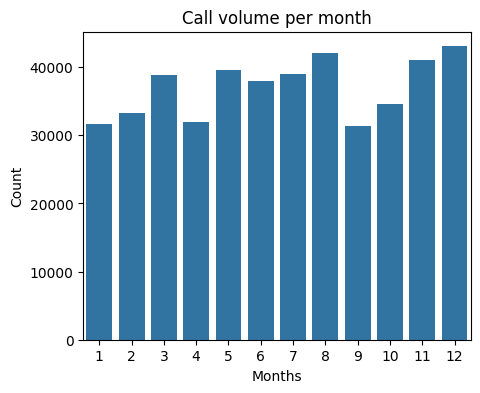

In [19]:
# Se grafica el volumne de llamadas por mes
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='month')

plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Call volume per month')
plt.show()

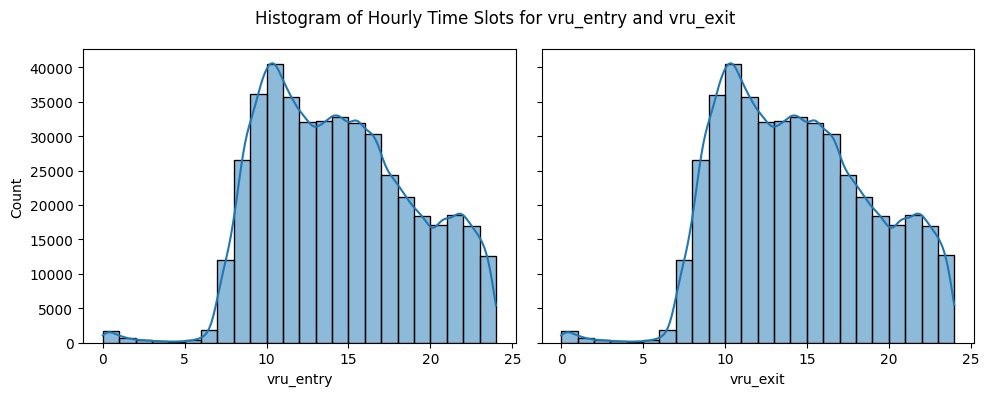

In [20]:
# Se observan la frecuencia de llamadas por horas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
sns.histplot(data=df, x=(df['vru_entry'] - df['vru_entry'].dt.normalize()) / pd.Timedelta(hours=1), bins=24, kde=True, ax=ax1)
sns.histplot(data=df, x=(df['vru_exit'] - df['vru_exit'].dt.normalize()) / pd.Timedelta(hours=1), bins=24, kde=True, ax=ax2)

ax1.set_xlabel('vru_entry') ; ax1.set_ylabel('Count')
ax2.set_xlabel('vru_exit')
plt.suptitle('Histogram of Hourly Time Slots for vru_entry and vru_exit')
plt.tight_layout()
plt.show()

In [21]:
df['vru_time'].describe()

count    444448.000000
mean         10.286081
std          34.942136
min        -362.000000
25%           6.000000
50%           8.000000
75%          10.000000
max        4832.000000
Name: vru_time, dtype: float64

In [22]:
# Se cuentan los valores negativos
neg_count = (df['vru_time'] < 0).sum()
perc_neg = round(neg_count/df['vru_time'].count()*100, 2)
print('Cantidad de valores negativos: ', neg_count)
print('Porcentaje sobre el total:', perc_neg, '%')

Cantidad de valores negativos:  350
Porcentaje sobre el total: 0.08 %


In [23]:
df['vru_entry_corr'] = np.where(df['vru_entry'] > df['vru_exit'], df['vru_exit'], df['vru_entry'])
df['vru_exit_corr'] = np.where(df['vru_entry'] > df['vru_exit'], df['vru_entry'], df['vru_exit'])

In [24]:
df['vru_time_corr'] = (df['vru_exit_corr'] - df['vru_entry_corr']).dt.total_seconds()
df['vru_time_corr'] = df['vru_time_corr'].astype('int64')

In [25]:
# Se verifican los cambios
df['vru_time_corr'].describe()

count    444448.000000
mean         10.396357
std          34.909485
min           0.000000
25%           6.000000
50%           8.000000
75%          10.000000
max        4832.000000
Name: vru_time_corr, dtype: float64

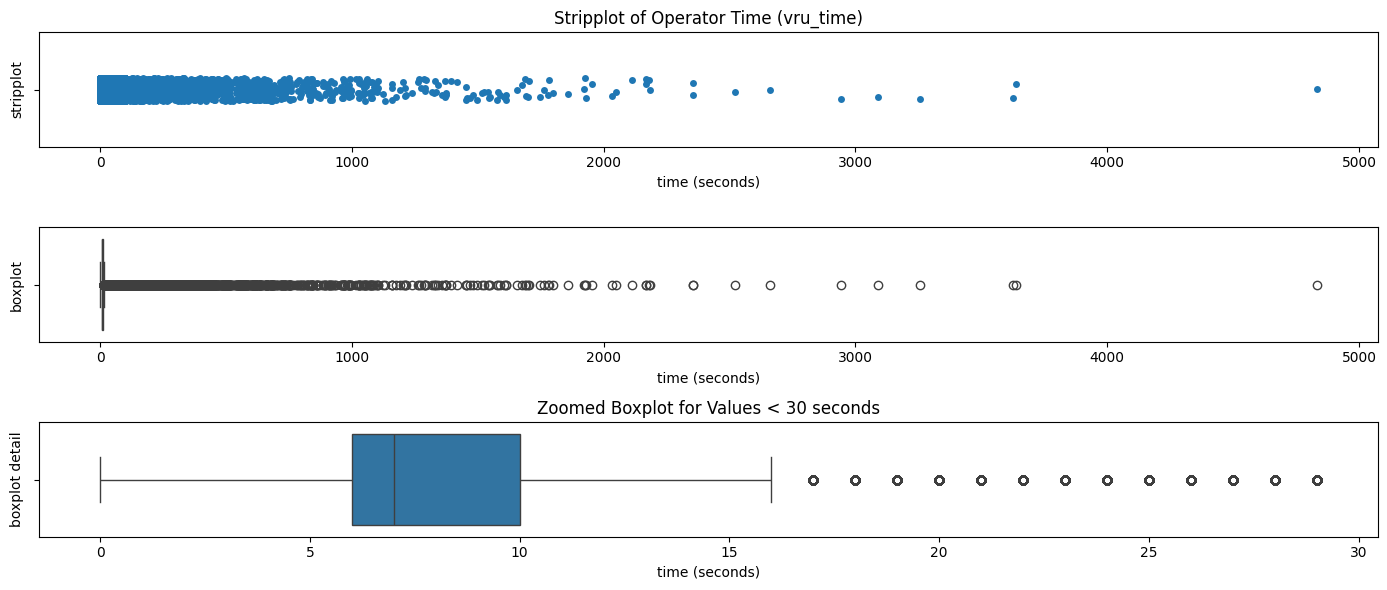

In [26]:
# Se grafican la dispersion de las llamadas y un boxplot a la misma escala que el stripplot y detalle
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(311)
sns.stripplot(data=df, x='vru_time_corr', ax=ax1)
ax1.set_xlabel('time (seconds)') ; ax1.set_ylabel('stripplot') ; ax1.set_title('Stripplot of Operator Time (vru_time)')

ax2 = fig.add_subplot(312, sharex=ax1)
sns.boxplot(data=df, x='vru_time_corr', ax=ax2)
ax2.set_xlabel('time (seconds)') ; ax2.set_ylabel('boxplot')

ax3 = fig.add_subplot(313)
sns.boxplot(data=df[df['vru_time_corr'] < 30], x='vru_time_corr', ax=ax3)
ax3.set_xlabel('time (seconds)') ; ax3.set_ylabel('boxplot detail') ; ax3.set_title('Zoomed Boxplot for Values < 30 seconds')

plt.tight_layout()

In [27]:
outlier_count = (df['vru_time_corr'] > 16).sum()
perc_outlier = round(outlier_count/df['vru_time_corr'].count()*100,2)
print('Cantidad de valores outlier sobre 16 segundos: ', outlier_count)
print('Porcentaje sobre el total:', perc_outlier, '%')

Cantidad de valores outlier sobre 16 segundos:  26654
Porcentaje sobre el total: 6.0 %


In [28]:
outlier_count = (df['vru_time_corr'] > 1000).sum()
perc_outlier = round(outlier_count/df['vru_time_corr'].count()*100,2)
print('Cantidad de valores outlier sobre 1000 segundos: ', outlier_count)
print('Porcentaje sobre el total:', perc_outlier, '%')

Cantidad de valores outlier sobre 1000 segundos:  110
Porcentaje sobre el total: 0.02 %


In [29]:
df = df[df['vru_time_corr'] <=1000]
(df['vru_time_corr'] > 1000).sum()

np.int64(0)

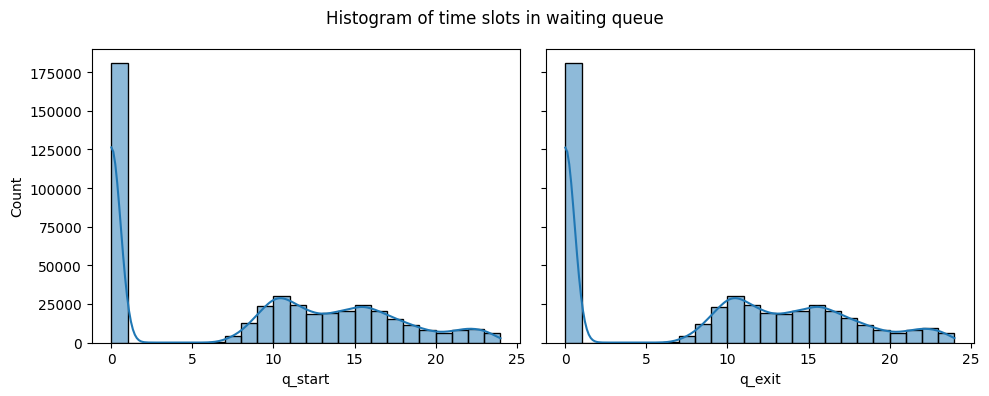

In [30]:
# Se observan la frecuencia de llamadas por horas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
sns.histplot(data=df, x=(df['q_start'] - df['q_start'].dt.normalize()) / pd.Timedelta(hours=1), bins=24, kde=True, ax=ax1)
sns.histplot(data=df, x=(df['q_exit'] - df['q_exit'].dt.normalize()) / pd.Timedelta(hours=1), bins=24, kde=True, ax=ax2)

ax1.set_xlabel('q_start') ; ax1.set_ylabel('Count')
ax2.set_xlabel('q_exit')
plt.suptitle('Histogram of time slots in waiting queue')
plt.tight_layout()
plt.show()

In [31]:
count_midnight = (df['q_start'].dt.time == pd.to_datetime('00:00:00').time()).sum()
perc_midnight = round(count_midnight/df['q_start'].count()*100, 2)
print('Cantidad de valores 00:00:00: ', count_midnight)
print('Porcentaje sobre el total:', perc_midnight)

Cantidad de valores 00:00:00:  180739
Porcentaje sobre el total: 40.68


In [33]:
# Se agrega una columna con los tiempos reales de espera
def modify_q_time(row):
    if row['priority'] == 2:
        modified_value = row['q_time'] - 90
        return max(modified_value, 0)
    else:
        return row['q_time']

df['q_time_real'] = df.apply(modify_q_time, axis=1)

In [34]:
df['q_time_real'].describe()

count    444338.000000
mean         42.299657
std         113.656575
min           0.000000
25%           0.000000
50%           0.000000
75%          44.000000
max       28693.000000
Name: q_time_real, dtype: float64

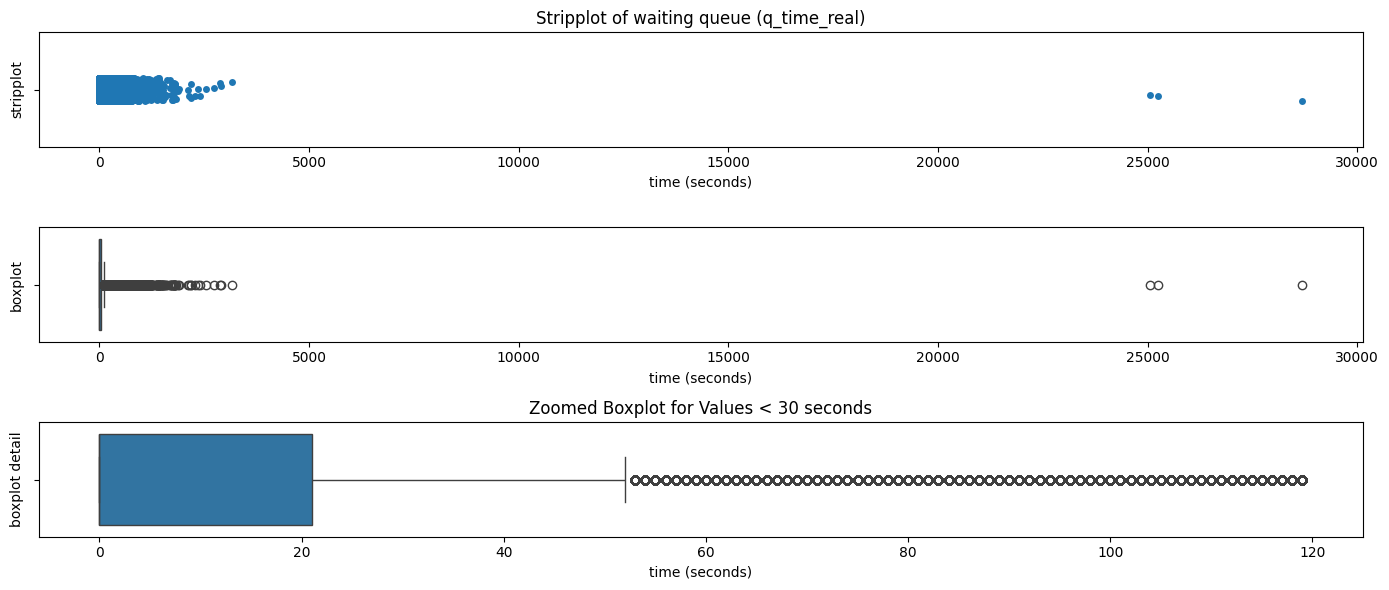

In [35]:
# Se grafican la dispersion de las llamadas y un boxplot a la misma escala que el stripplot y detalle
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(311)
sns.stripplot(data=df, x='q_time_real', ax=ax1)
ax1.set_xlabel('time (seconds)') ; ax1.set_ylabel('stripplot') ; ax1.set_title('Stripplot of waiting queue (q_time_real)')

ax2 = fig.add_subplot(312, sharex=ax1)
sns.boxplot(data=df, x='q_time_real', ax=ax2)
ax2.set_xlabel('time (seconds)') ; ax2.set_ylabel('boxplot')

ax3 = fig.add_subplot(313)
sns.boxplot(data=df[df['q_time_real'] < 30], x='q_time', ax=ax3)
ax3.set_xlabel('time (seconds)') ; ax3.set_ylabel('boxplot detail') ; ax3.set_title('Zoomed Boxplot for Values < 30 seconds')

plt.tight_layout()

In [36]:
df = df[df['q_time'] < 20000]
(df['q_time'] > 20000).sum()

np.int64(0)

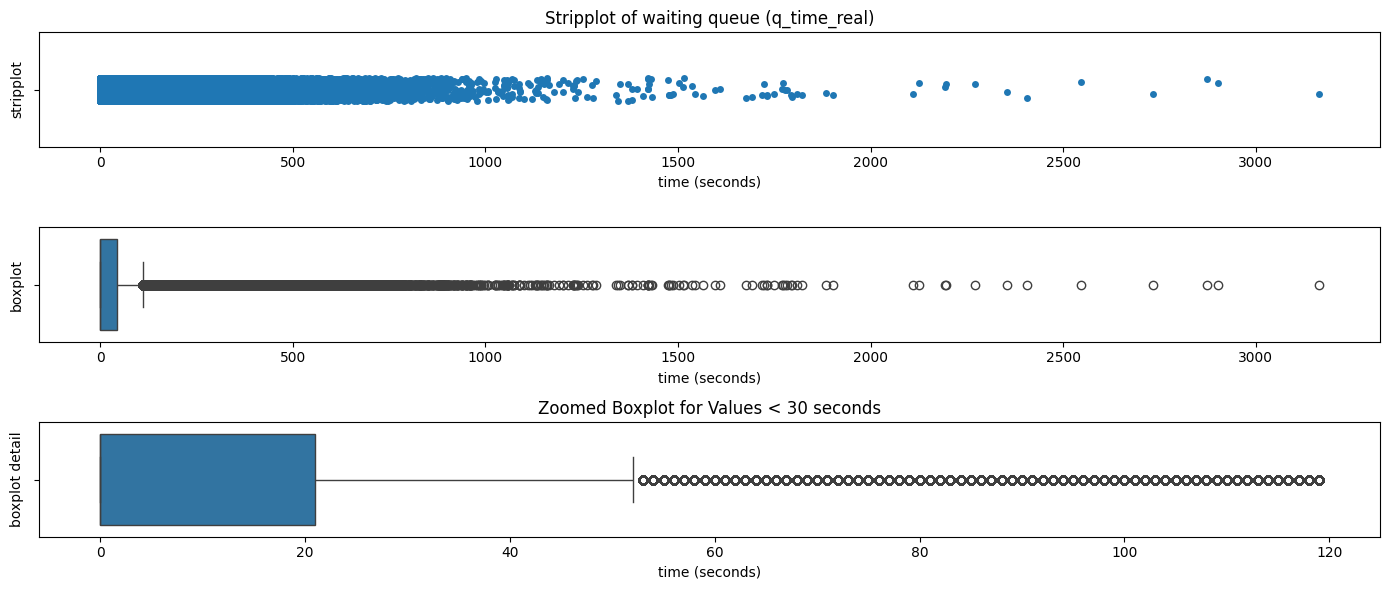

In [37]:
# Se grafican nuevamente
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(311)
sns.stripplot(data=df, x='q_time_real', ax=ax1)
ax1.set_xlabel('time (seconds)') ; ax1.set_ylabel('stripplot') ; ax1.set_title('Stripplot of waiting queue (q_time_real)')

ax2 = fig.add_subplot(312, sharex=ax1)
sns.boxplot(data=df, x='q_time_real', ax=ax2)
ax2.set_xlabel('time (seconds)') ; ax2.set_ylabel('boxplot')

ax3 = fig.add_subplot(313)
sns.boxplot(data=df[df['q_time_real'] < 30], x='q_time', ax=ax3)
ax3.set_xlabel('time (seconds)') ; ax3.set_ylabel('boxplot detail') ; ax3.set_title('Zoomed Boxplot for Values < 30 seconds')

plt.tight_layout()

In [38]:
outlier_count = (df['q_time'] > 2000).sum()
perc_outlier = round(outlier_count/df['q_time'].count()*100,2)
print('Cantidad de valores outlier sobre 2000 segundos: ', outlier_count)
print('Porcentaje sobre el total:', perc_outlier, '%')

Cantidad de valores outlier sobre 2000 segundos:  12
Porcentaje sobre el total: 0.0 %


In [39]:
outlier_count = (df['q_time'] > 1000).sum()
perc_outlier = round(outlier_count/df['q_time'].count()*100,2)
print('Cantidad de valores outlier sobre 1000 segundos: ', outlier_count)
print('Porcentaje sobre el total:', perc_outlier, '%')

Cantidad de valores outlier sobre 1000 segundos:  138
Porcentaje sobre el total: 0.03 %


In [40]:
df = df[df['q_time'] <= 1000]
(df['q_time'] > 1000).sum()

np.int64(0)

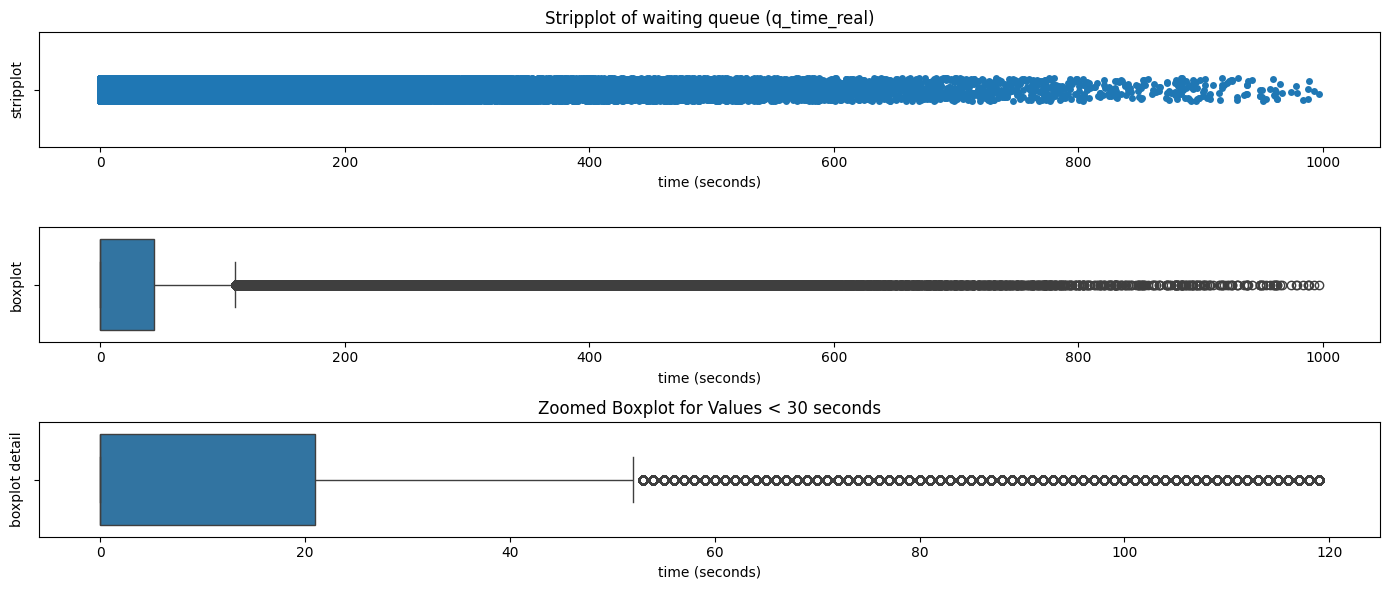

In [41]:
# Se grafican nuevamente
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(311)
sns.stripplot(data=df, x='q_time_real', ax=ax1)
ax1.set_xlabel('time (seconds)') ; ax1.set_ylabel('stripplot') ; ax1.set_title('Stripplot of waiting queue (q_time_real)')

ax2 = fig.add_subplot(312, sharex=ax1)
sns.boxplot(data=df, x='q_time_real', ax=ax2)
ax2.set_xlabel('time (seconds)') ; ax2.set_ylabel('boxplot')

ax3 = fig.add_subplot(313)
sns.boxplot(data=df[df['q_time_real'] < 30], x='q_time', ax=ax3)
ax3.set_xlabel('time (seconds)') ; ax3.set_ylabel('boxplot detail') ; ax3.set_title('Zoomed Boxplot for Values < 30 seconds')

plt.tight_layout()

In [42]:
df['q_time'].describe()

count    444197.000000
mean         58.426160
std          94.813407
min           0.000000
25%           0.000000
50%          16.000000
75%          78.000000
max         997.000000
Name: q_time, dtype: float64

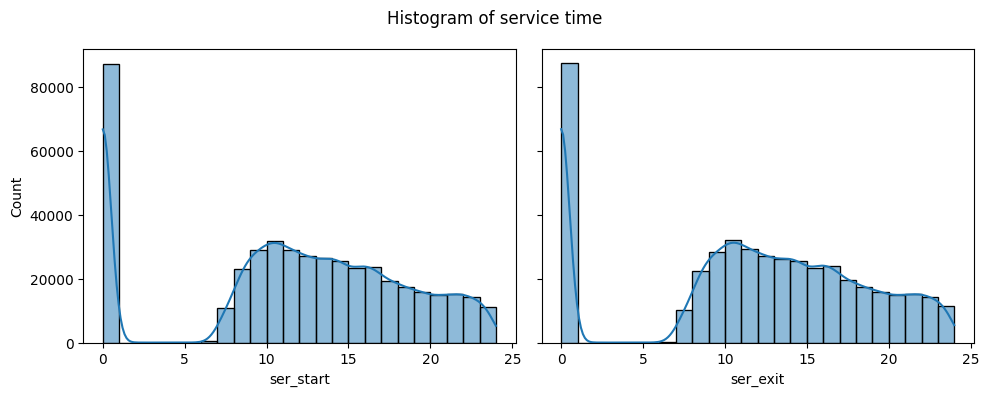

In [43]:
# Se observan la frecuencia de llamadas por horas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
sns.histplot(data=df, x=(df['ser_start'] - df['ser_start'].dt.normalize()) / pd.Timedelta(hours=1), bins=24, kde=True, ax=ax1)
sns.histplot(data=df, x=(df['ser_exit'] - df['ser_exit'].dt.normalize()) / pd.Timedelta(hours=1), bins=24, kde=True, ax=ax2)

ax1.set_xlabel('ser_start') ; ax1.set_ylabel('Count')
ax2.set_xlabel('ser_exit')
plt.suptitle('Histogram of service time')
plt.tight_layout()
plt.show()

In [44]:
count_midnight = (df['ser_start'].dt.time == pd.to_datetime('00:00:00').time()).sum()
perc_midnight = round(count_midnight/df['ser_start'].count()*100, 2)
print('Cantidad de valores 00:00:00: ', count_midnight)
print('Porcentaje sobre el total:', perc_midnight)

Cantidad de valores 00:00:00:  86972
Porcentaje sobre el total: 19.58


In [45]:
df['ser_time'].describe()

count    444197.000000
mean        152.387051
std         263.423425
min           0.000000
25%          12.000000
50%          84.000000
75%         185.000000
max       36291.000000
Name: ser_time, dtype: float64

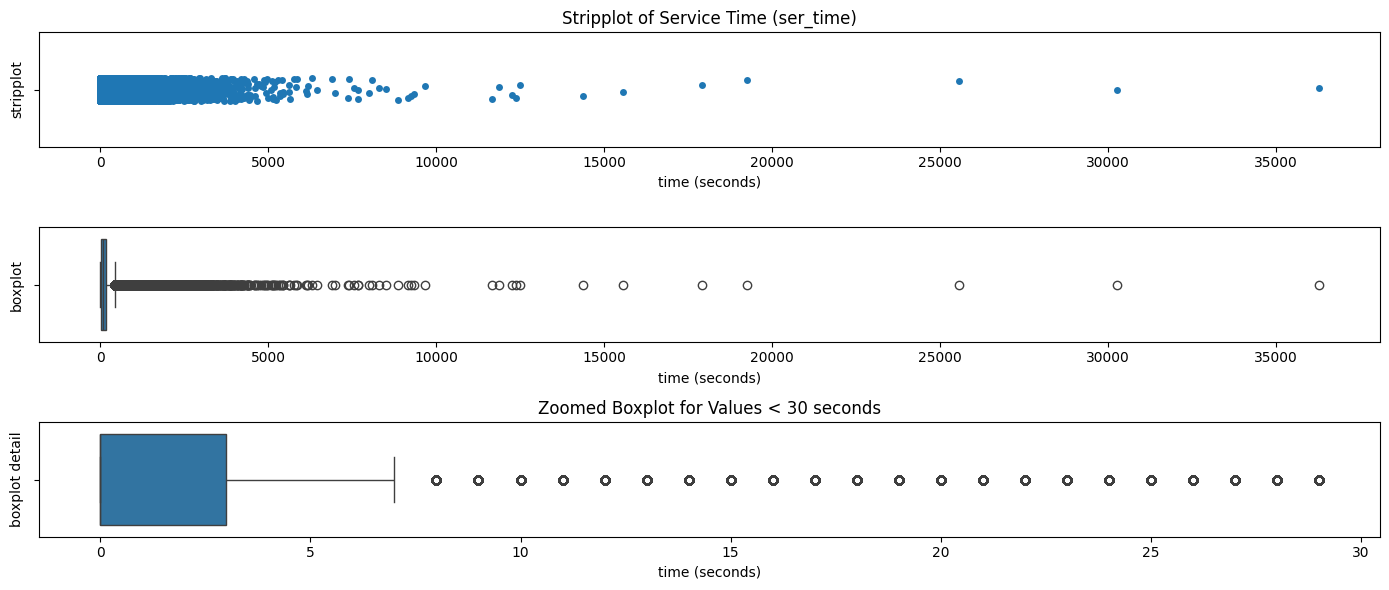

In [46]:
# Se grafican la dispersion de las llamadas y un boxplot a la misma escala que el stripplot y detalle
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(311)
sns.stripplot(data=df, x='ser_time', ax=ax1)
ax1.set_xlabel('time (seconds)') ; ax1.set_ylabel('stripplot') ; ax1.set_title('Stripplot of Service Time (ser_time)')

ax2 = fig.add_subplot(312, sharex=ax1)
sns.boxplot(data=df, x='ser_time', ax=ax2)
ax2.set_xlabel('time (seconds)') ; ax2.set_ylabel('boxplot')

ax3 = fig.add_subplot(313)
sns.boxplot(data=df[df['ser_time'] < 30], x='ser_time', ax=ax3)
ax3.set_xlabel('time (seconds)') ; ax3.set_ylabel('boxplot detail') ; ax3.set_title('Zoomed Boxplot for Values < 30 seconds')

plt.tight_layout()

In [47]:
zero_count = (df['ser_time'] == 0).sum()
perc_zero = round(zero_count/df['ser_time'].count()*100,2)
print('Cantidad de valores de 0 segundos: ', zero_count)
print('Porcentaje sobre el total:', perc_zero, '%')

Cantidad de valores de 0 segundos:  87682
Porcentaje sobre el total: 19.74 %


In [48]:
outlier_count = (df['ser_time'] > 25000).sum()
perc_outlier = round(outlier_count/df['ser_time'].count()*100,2)
print('Cantidad de valores outlier sobre 25000 segundos: ', outlier_count)
print('Porcentaje sobre el total:', perc_outlier, '%')

Cantidad de valores outlier sobre 25000 segundos:  3
Porcentaje sobre el total: 0.0 %


In [49]:
outlier_count = (df['ser_time'] > 1000).sum()
perc_outlier = round(outlier_count/df['ser_time'].count()*100,2)
print('Cantidad de valores outlier sobre 1000 segundos: ', outlier_count)
print('Porcentaje sobre el total:', perc_outlier, '%')

Cantidad de valores outlier sobre 1000 segundos:  5790
Porcentaje sobre el total: 1.3 %


In [50]:
df = df[df['ser_time'] <= 1000]
(df['ser_time'] > 1000).sum()

np.int64(0)

In [51]:
df['ser_time'].describe()

count    438407.000000
mean        133.686310
std         165.010078
min           0.000000
25%          10.000000
50%          82.000000
75%         178.000000
max        1000.000000
Name: ser_time, dtype: float64

In [52]:
df['vru.line'].unique()

array(['AA0101', 'AA0102', 'AA0103', 'AA0104', 'AA0105', 'AA0106',
       'AA0107', 'AA0108', 'AA0109', 'AA0110', 'AA0111', 'AA0112',
       'AA0115', 'AA0116', 'AA0201', 'AA0202', 'AA0203', 'AA0204',
       'AA0205', 'AA0206', 'AA0209', 'AA0210', 'AA0213', 'AA0214',
       'AA0215', 'AA0216', 'AA0113', 'AA0207', 'AA0208', 'AA0114'],
      dtype=object)

In [53]:
df['vru.line'].describe()

count     438407
unique        30
top       AA0209
freq       21206
Name: vru.line, dtype: object

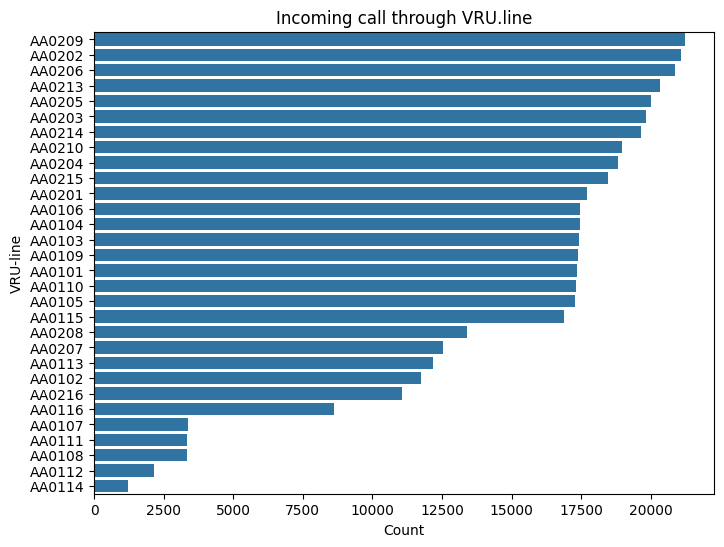

In [54]:
cantidad = df['vru.line'].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=cantidad.values, y=cantidad.index, ax=ax)
ax.set_xlabel('Count') ; ax.set_ylabel('VRU-line') ; ax.set_title('Incoming call through VRU.line')
plt.show()

In [55]:
perc_vru_line = (df['vru.line'].value_counts() / len(df)) * 100
perc_vru_line[:5]

vru.line
AA0209    4.837058
AA0202    4.809230
AA0206    4.757223
AA0213    4.634506
AA0205    4.560374
Name: count, dtype: float64

In [56]:
df['call_id'].value_counts()

call_id
36234    16
36235    16
34542    16
34541    16
34540    16
         ..
55641     1
55640     1
55639     1
55638     1
55637     1
Name: count, Length: 54458, dtype: int64

In [57]:
df['customer_id'].value_counts()

customer_id
0.0           176132
0              55052
58859752.0      1652
58704610.0      1370
52867744.0      1184
               ...  
25411414.0         1
56825763.0         1
33046368.0         1
25603218.0         1
25773516.0         1
Name: count, Length: 18996, dtype: int64

In [58]:
df['customer_id'] = df['customer_id'].replace('0', 0.0)

In [59]:
df['customer_id'].value_counts()

customer_id
0.0           231184
58859752.0      1652
58704610.0      1370
52867744.0      1184
58029430.0      1087
               ...  
22343792.0         1
53918140.0         1
14558787.0         1
53348264.0         1
56825763.0         1
Name: count, Length: 18995, dtype: int64

In [60]:
df['customer_id'].nunique()

18995

In [61]:
(df['customer_id'].value_counts() / len(df)) * 100

customer_id
0.0           52.732735
58859752.0     0.376819
58704610.0     0.312495
52867744.0     0.270069
58029430.0     0.247943
                ...    
22343792.0     0.000228
53918140.0     0.000228
14558787.0     0.000228
53348264.0     0.000228
56825763.0     0.000228
Name: count, Length: 18995, dtype: float64

In [62]:
df['priority'].value_counts()

priority
0    231796
2    135352
1     71259
Name: count, dtype: int64

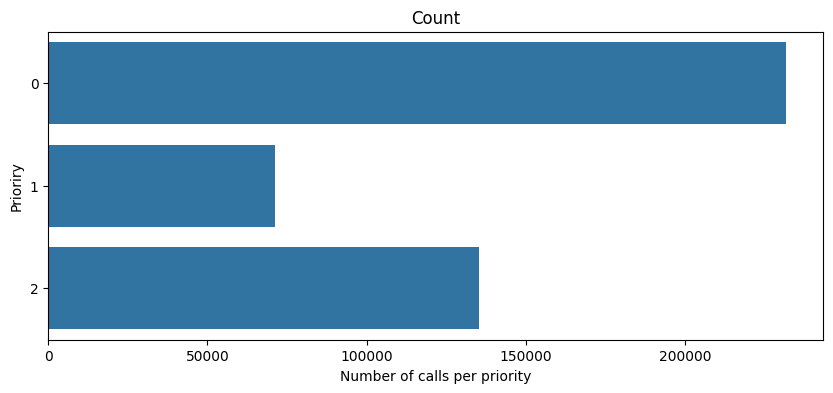

In [63]:
fig = plt.figure(figsize=(10, 4))

cantidad = df['priority'].value_counts()
sns.barplot(x=cantidad.values, y=cantidad.index)
plt.xlabel('Number of calls per priority') ; plt.ylabel('Prioriry') ; plt.title('Count')
plt.show()

In [64]:
(df['priority'].value_counts() / len(df)) * 100

priority
0    52.872331
2    30.873595
1    16.254074
Name: count, dtype: float64

In [65]:
df['type'].value_counts()

type
PS     299679
NW      67495
NE      38030
IN      19220
TT      12183
PE       1789
 TT         6
AA          5
Name: count, dtype: int64

In [66]:
# Se observa que 'TT' tiene espacios extras, por lo que se limpia esa columna.
df['type'] = df['type'].str.strip()
df['type'].value_counts()

type
PS    299679
NW     67495
NE     38030
IN     19220
TT     12189
PE      1789
AA         5
Name: count, dtype: int64

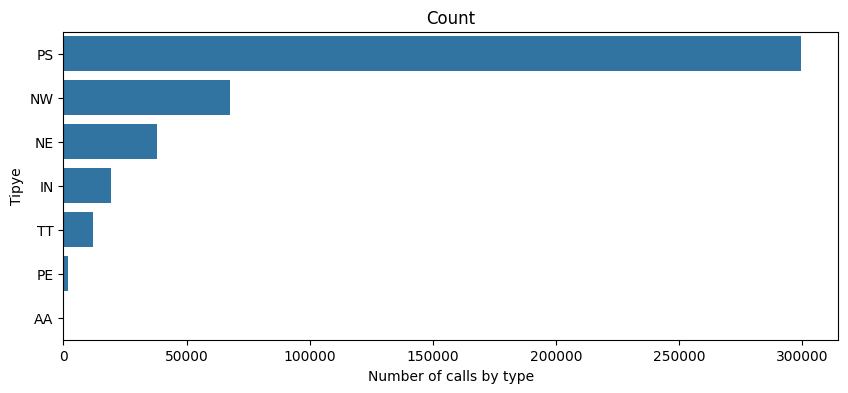

In [67]:
cantidad = df['type'].value_counts()

fig = plt.figure(figsize=(10, 4))
sns.barplot(x=cantidad.values, y=cantidad.index)
plt.xlabel('Number of calls by type') ; plt.ylabel('Tipye') ; plt.title('Count')
plt.show()

In [68]:
round(((df['type'].value_counts() / len(df)) * 100),2)

type
PS    68.36
NW    15.40
NE     8.67
IN     4.38
TT     2.78
PE     0.41
AA     0.00
Name: count, dtype: float64

In [69]:
df = df[df['type'] != 'AA']
(df['type'] == 'AA').sum()

np.int64(0)

In [70]:
df['outcome'].value_counts()

outcome
AGENT      347323
HANG        87495
PHANTOM      3584
Name: count, dtype: int64

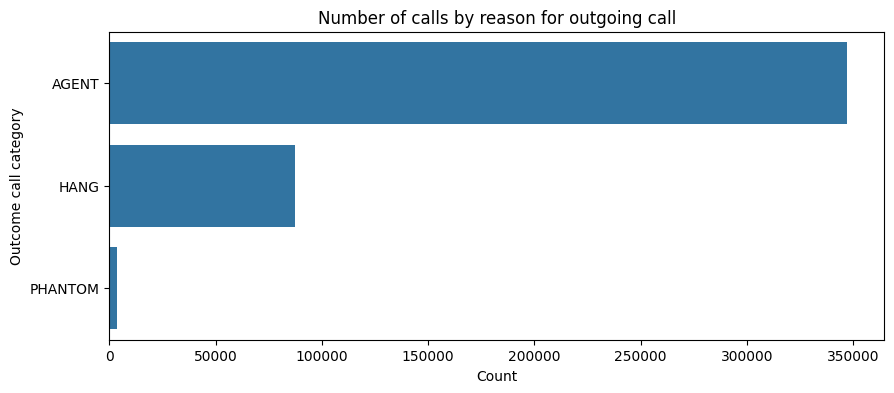

In [71]:
cantidad = df['outcome'].value_counts()

fig = plt.figure(figsize=(10, 4))
sns.barplot(x=cantidad.values, y=cantidad.index)
plt.xlabel('Count') ; plt.ylabel('Outcome call category') ; plt.title('Number of calls by reason for outgoing call')
plt.show()

In [72]:
round(((df['outcome'].value_counts() / len(df)) * 100),2)

outcome
AGENT      79.22
HANG       19.96
PHANTOM     0.82
Name: count, dtype: float64

In [75]:
# Se quieren ver todas las categorías
count_server = df['server'].value_counts()
category_server = pd.DataFrame({'Category': count_server.index, 'Count': count_server.values})
category_server.head(10)

,Category,Count
0,NO_SERVER,96269
1,SHARON,27350
2,STEREN,20338
3,AVNI,19787
4,MORIAH,19420
5,AVI,19366
6,KAZAV,18527
7,YITZ,16962
8,TOVA,16957
9,BASCH,15456


In [76]:
top5 = df['server'].value_counts()[:5]
top5

server
NO_SERVER    96269
SHARON       27350
STEREN       20338
AVNI         19787
MORIAH       19420
Name: count, dtype: int64

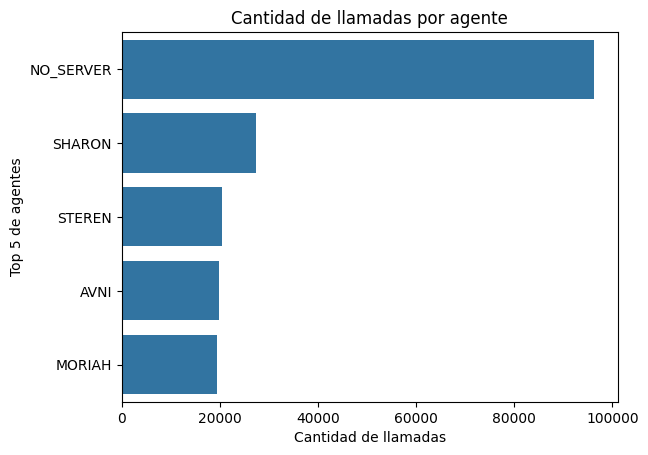

In [77]:
sns.barplot(x=top5.values, y=top5.index.tolist())
plt.xlabel('Cantidad de llamadas')
plt.ylabel('Top 5 de agentes')
plt.title('Cantidad de llamadas por agente')
plt.show()

In [78]:
round(((df['server'].value_counts() / len(df)) * 100),2)[:5]

server
NO_SERVER    21.96
SHARON        6.24
STEREN        4.64
AVNI          4.51
MORIAH        4.43
Name: count, dtype: float64

In [79]:
# Eliminación de server
df = df.drop('server', axis=1)

In [80]:
df.to_csv('./Datasets/Call_center_limpio.csv', index=False)